In [14]:
#8) Titanic Dataset
#a) Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?
import pandas as pd
df = pd.read_csv("titanic.csv")
pclass_survival = df.groupby("Pclass")["Survived"].mean().reset_index()
pclass_survival.columns = ["Pclass", "Survival_Rate"]

print("Survival Rate by Class:")
print(pclass_survival)

Survival Rate by Class:
   Pclass  Survival_Rate
0       1       0.629630
1       2       0.472826
2       3       0.242363


In [15]:
#b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?
df["AgeGroup"] = df["Age"].apply(lambda x: "Child" if x < 18 else "Adult")
df_age = df.dropna(subset=["Age"])
age_survival = df_age.groupby("AgeGroup")["Survived"].mean().reset_index()

print("\nSurvival Rate by Age Group:")
print(age_survival)


Survival Rate by Age Group:
  AgeGroup  Survived
0    Adult  0.381032
1    Child  0.539823


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

/tmp/ipython-input-4212381102.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')


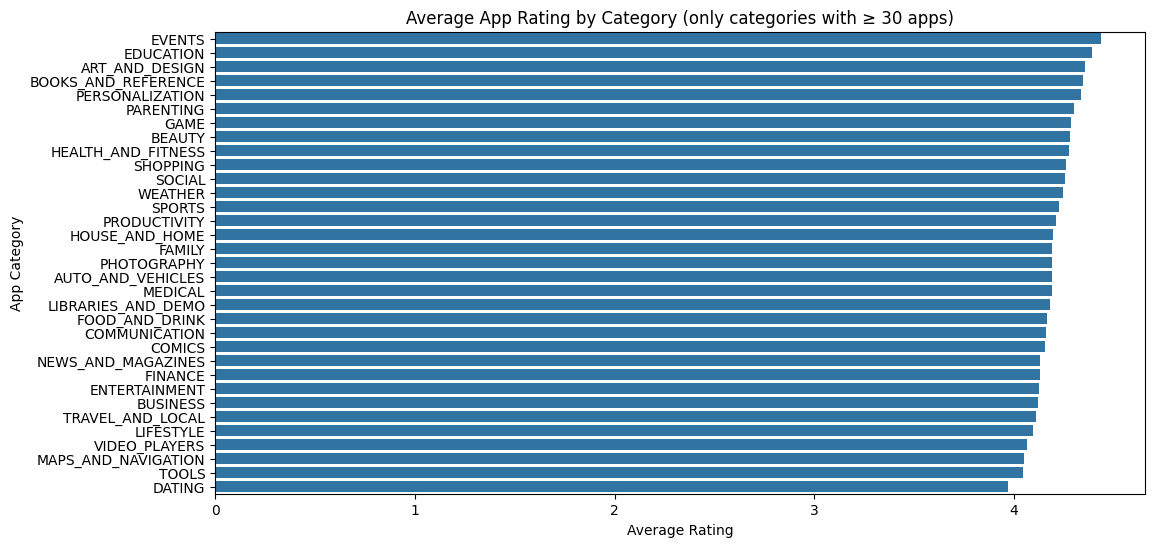

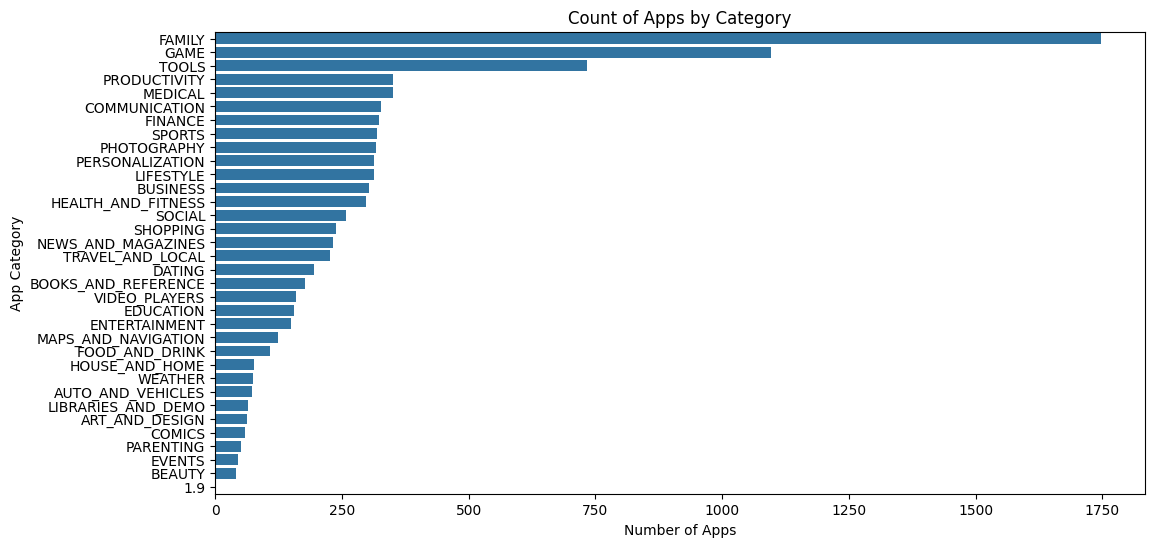

In [20]:
#7) Google play store
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("googleplaystore.csv")

print(df.head())
print("Columns:", df.columns.tolist())

df_clean = df.dropna(subset=['Rating', 'Category'])

df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')

cat_stats = df_clean.groupby('Category')['Rating'].agg(['count', 'mean', 'median', 'std']).reset_index()
cat_stats = cat_stats.sort_values(by='mean', ascending=False)

print(cat_stats.head(10))
print("\nLowest 10 categories by average rating:")
print(cat_stats.tail(10))

min_count = 30
filtered = cat_stats[cat_stats['count'] >= min_count]
plt.figure(figsize=(12,6))
sns.barplot(data=filtered, x='mean', y='Category', order=filtered.sort_values('mean', ascending=False)['Category'])
plt.xlabel("Average Rating")
plt.ylabel("App Category")
plt.title("Average App Rating by Category (only categories with ≥ {} apps)".format(min_count))
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=cat_stats.sort_values('count', ascending=False), x='count', y='Category')
plt.xlabel("Number of Apps")
plt.ylabel("App Category")
plt.title("Count of Apps by Category")
plt.show()
